In [ ]:
pip install torch torchvision


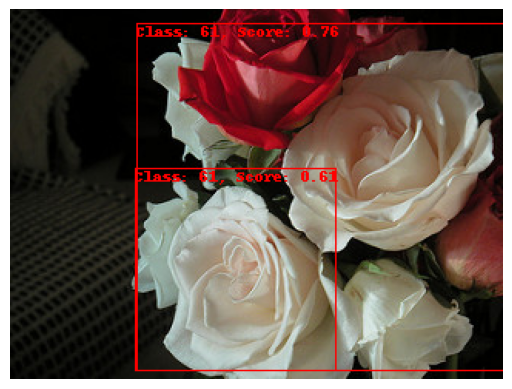

In [5]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import urllib
import os
import matplotlib.pyplot as plt

# Download the flower dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = "flower_photos"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    urllib.request.urlretrieve(dataset_url, os.path.join(data_dir, "flower_photos.tgz"))
    import tarfile
    with tarfile.open(os.path.join(data_dir, "flower_photos.tgz"), "r:gz") as tar:
        tar.extractall(data_dir)

# Load the pre-trained Faster R-CNN model with MobileNet V3 backbone
model = fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
model.eval()

# Prepare the image
def prepare_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image)
    return image_tensor.unsqueeze(0)

# Perform inference and draw bounding boxes
def detect_objects(image_path, confidence_threshold=0.5):
    image_tensor = prepare_image(image_path)
    with torch.no_grad():
        outputs = model(image_tensor)

    detections = outputs[0]['boxes'].detach().cpu().numpy()
    labels = outputs[0]['labels'].detach().cpu().numpy()
    scores = outputs[0]['scores'].detach().cpu().numpy()

    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    for box, label, score in zip(detections, labels, scores):
        if score > confidence_threshold:
            draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="red")
            draw.text((box[0], box[1]), f"Class: {label}, Score: {score:.2f}", fill="red")

    return image

# Example usage
image_path = os.path.join(data_dir, "flower_photos/roses/102501987_3cdb8e5394_n.jpg")
detected_image = detect_objects(image_path)
detected_image.show()

plt.imshow(detected_image)
plt.axis('off')
plt.show()